# Import Dependencies

We begin by importing the necessary libraries. 

In [1]:
# System & OS
import os

# Data analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style('white')

# Reproducibility

Set the seed to ensure our results are reproducible.

In [2]:
def set_seed(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

SEED = 11
set_seed(SEED)

# Preprocessing

Read in the 1994 US Census data. Note, a separate R script was used to export the data into a CSV file.

In [3]:
# Read data & drop irrelevant columns
df = pd.read_csv('../data/census_df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

# Map income to label
df['label'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Display results
df.head()

,age,workclass,fnlwgt,education,education_1,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


We map the income levels to a binary label according to `0: <=$50K`, and `1: >$50K`.

# Train-Test Split

Split the data into `train` and `test` using an 80/20 split. 

In [4]:
# 80/20 train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)

# Print results
print(f'Original: {len(df)} entries\nTrain: {len(train_df)} entries\nTest: {len(test_df)} entries')

Original: 32561 entries
Train: 26048 entries
Test: 6513 entries


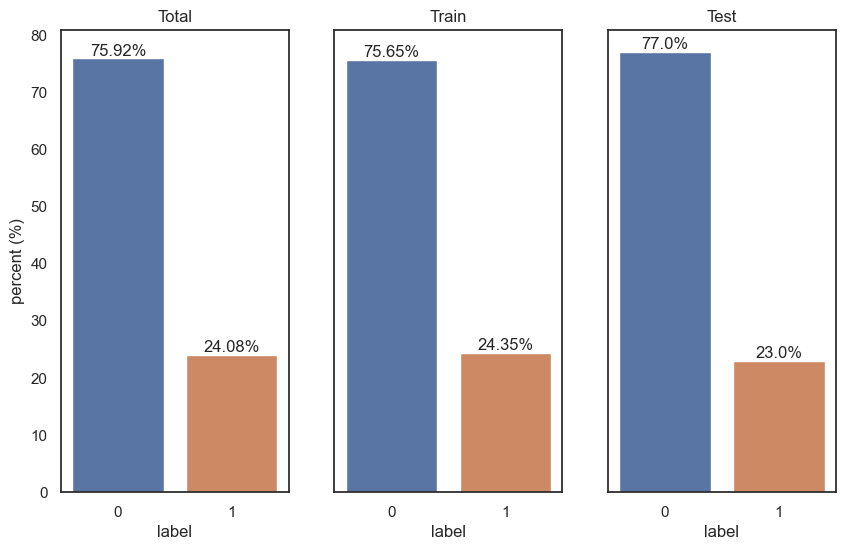

In [5]:
# Perform a normalized value count to obtain the percentage of values in each class
label_counts = df['label'].value_counts(normalize=True).apply(lambda x: x * 100).reset_index()
label_counts.rename(columns={'index': 'label', 'label': 'percent'}, inplace=True)
label_counts.sort_values(by='label', inplace=True)

train_label_counts = train_df['label'].value_counts(normalize=True).apply(lambda x: x * 100).reset_index()
train_label_counts.rename(columns={'index': 'label', 'label': 'percent'}, inplace=True)
train_label_counts.sort_values(by='label', inplace=True)

test_label_counts = test_df['label'].value_counts(normalize=True).apply(lambda x: x * 100).reset_index()
test_label_counts.rename(columns={'index': 'label', 'label': 'percent'}, inplace=True)
test_label_counts.sort_values(by='label', inplace=True)

# Visualize results using a bar graph
fig, ax = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
sns.barplot(x='label', y='percent', data=label_counts, ax=ax[0])
sns.barplot(x='label', y='percent', data=train_label_counts, ax=ax[1])
sns.barplot(x='label', y='percent', data=test_label_counts, ax=ax[2])

ax[0].set_title('Total')
ax[1].set_title('Train')
ax[2].set_title('Test')
ax[0].set_ylabel('percent (%)')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
for index, value in enumerate(label_counts['percent']):
    ax[0].text(index, value+0.5, f'{round(value, 2)}%', ha='center')
for index, value in enumerate(train_label_counts['percent']):
    ax[1].text(index, value+0.5, f'{round(value, 2)}%', ha='center')
for index, value in enumerate(test_label_counts['percent']):
    ax[2].text(index, value+0.5, f'{round(value, 2)}%', ha='center')

plt.show()

# Logistic Regression Analysis

Then, we fit a logistic regression model to the data using 1 predictor: `capital_gain`, and compute its confusion matrix and accuracy on `train` and `test`. 

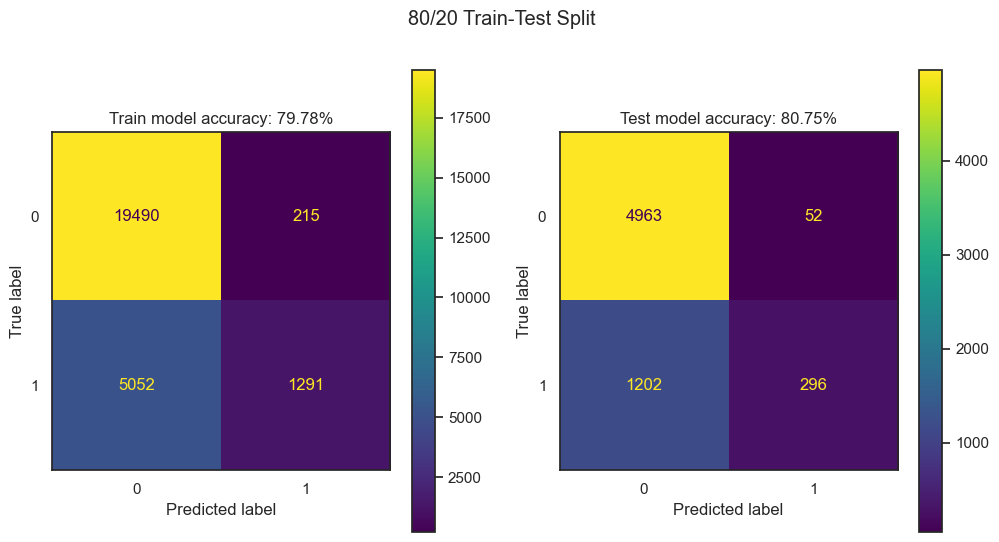

In [6]:
# Split the dataframes into X (features) and y (target)
X_train, y_train, X_test, y_test = train_df['capital_gain'].values.reshape(-1, 1), train_df['label'].values, test_df['capital_gain'].values.reshape(-1, 1), test_df['label'].values

# Create logistic regression object
model_1 = LogisticRegression(random_state=SEED)

# Fit the model to train
model_1.fit(X_train, y_train)

# Generate model predictions on train & test
y_pred_train, y_pred_test = model_1.predict(X_train), model_1.predict(X_test)

# Compute model accuracy
train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train) * 100, accuracy_score(y_test, y_pred_test) * 100

# Calculate and display the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1])
ax[0].set_title(f'Train model accuracy: {train_accuracy:.2f}%')
ax[1].set_title(f'Test model accuracy: {test_accuracy:.2f}%')
fig.suptitle('80/20 Train-Test Split')
plt.show()

While we notice a marginal improvement w.r.t. the null model, we'll omit discussions regarding the model's interpretation, in favor of testing our hypothesis: "are there any noticeable differences to the model's results if we'd used a different train-test split?"

# 90/10 Split

Repeating the exact same procedure, this time using a 90/10 train-test split.

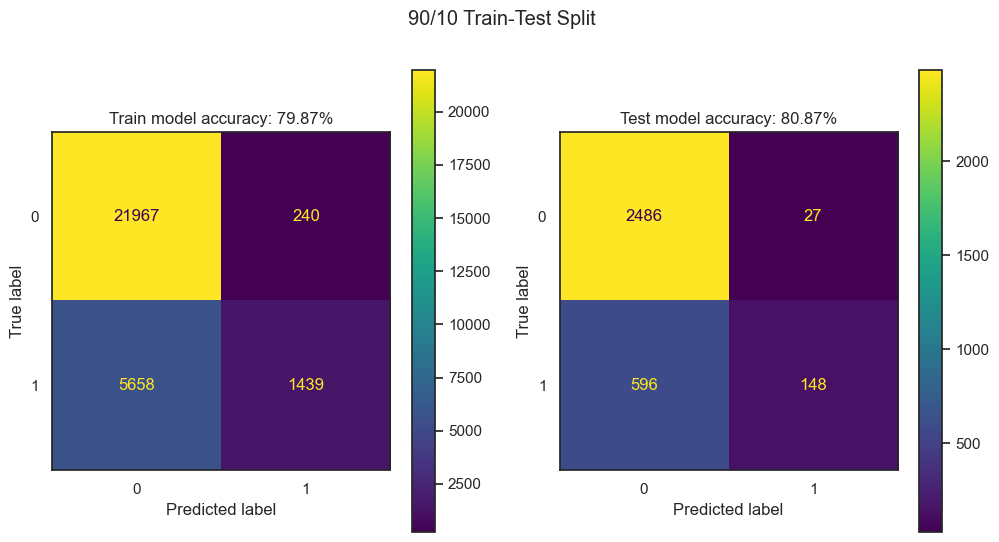

In [7]:
# 90/10 train-test split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=SEED)

# Split the dataframes into X (features) and y (target)
X_train, y_train, X_test, y_test = train_df['capital_gain'].values.reshape(-1, 1), train_df['label'].values, test_df['capital_gain'].values.reshape(-1, 1), test_df['label'].values

# Create logistic regression object
model_1 = LogisticRegression(random_state=SEED)

# Fit the model to train
model_1.fit(X_train, y_train)

# Generate model predictions on train & test
y_pred_train, y_pred_test = model_1.predict(X_train), model_1.predict(X_test)

# Compute model accuracy
train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train) * 100, accuracy_score(y_test, y_pred_test) * 100

# Calculate and display the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1])
ax[0].set_title(f'Train model accuracy: {train_accuracy:.2f}%')
ax[1].set_title(f'Test model accuracy: {test_accuracy:.2f}%')
fig.suptitle('90/10 Train-Test Split')
plt.show()

# 70/30 Split

And once more using a 70/30 train-test split.

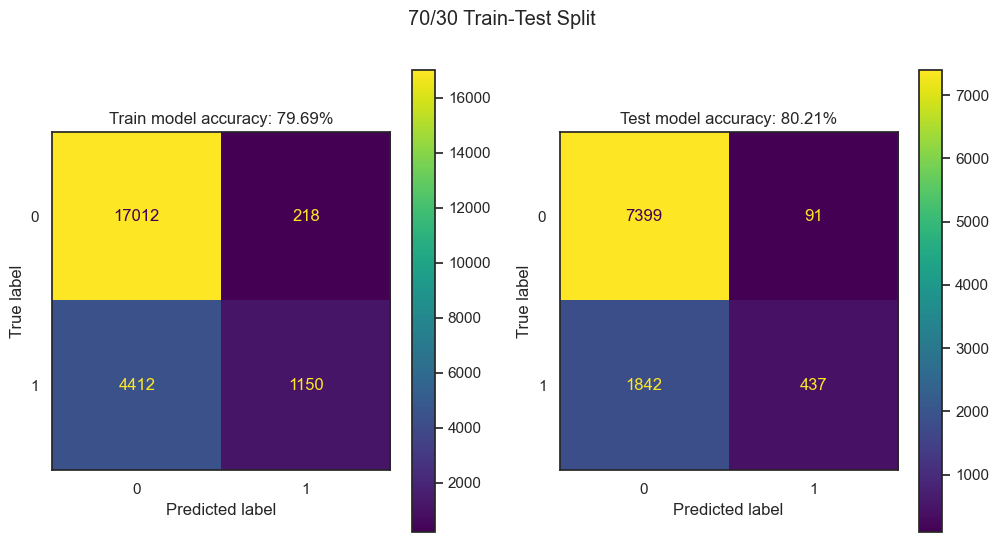

In [8]:
# 70/30 train-test split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=SEED)

# Split the dataframes into X (features) and y (target)
X_train, y_train, X_test, y_test = train_df['capital_gain'].values.reshape(-1, 1), train_df['label'].values, test_df['capital_gain'].values.reshape(-1, 1), test_df['label'].values

# Create logistic regression object
model_1 = LogisticRegression(random_state=SEED)

# Fit the model to train
model_1.fit(X_train, y_train)

# Generate model predictions on train & test
y_pred_train, y_pred_test = model_1.predict(X_train), model_1.predict(X_test)

# Compute model accuracy
train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train) * 100, accuracy_score(y_test, y_pred_test) * 100

# Calculate and display the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1])
ax[0].set_title(f'Train model accuracy: {train_accuracy:.2f}%')
ax[1].set_title(f'Test model accuracy: {test_accuracy:.2f}%')
fig.suptitle('70/30 Train-Test Split')
plt.show()

# Conclusions

From their accuracies and confusion matrices on both `train` and `test`, we do not notice any significant deviations across all 3 trials, leading us to believe that choosing the correct train-test split is an endeavour with some margin for error. 